<a href="https://colab.research.google.com/github/dhruva235/Assignment/blob/main/FInal-ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://imgur.com/3VVPpsz)



# Car Sales Prediction- Predict if a car purchased is a Good or Bad

![](https://vehiclecare.in/blaze/wp-content/uploads/2022/05/Used-Car-vs-New-Car-Which-One-Should-You-Buy.png)

Machine Learning allows the computer to learn
from experience and understand the world in terms of hierarchy. The field of this is interested in
finding the regularities in the data through the use of computer algorithms and with the help of these
regularities perform tasks like classifying the data into different classes or predicting the output on
the basis of input data.

### Problem Statement ([Dataset](https://www.kaggle.com/competitions/DontGetKicked/data))
* One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of that the vehicle might have serious issues that prevent it from being sold to customers. The auto community calls these unfortunate purchases "kicks".

* Kicked cars often result when there are tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller, or some other unforeseen problem. Kick cars can be very costly to dealers after transportation cost, throw-away repair work, and market losses in reselling the vehicle.

* Modelers who can figure out which cars have a higher risk of being kick can provide real value to dealerships trying to provide the best inventory selection possible to their customers.

* The challenge of this competition is to predict if the car purchased at the Auction is a Kick (bad buy).



### Approach
I'll practice machine learning skills with an approachable training dataset of dates, year ,Mfg Date, price ,type of the Car.

### Evaluation

The evaluation metric for this project is F1 Score.

The F1 is calculated as:

$[{2* \frac{Precision*Recall}{Precision + Recall}}]$

where:

Precision gives the fraction of correctly identified as positive out of all predicted as positives.
$Precision = {2* \frac{TP}{TP + FP}}$

Recall gives the fraction you correctly identified as positive out of all positives.
$Recall = {2* \frac{TP}{TP + FN}}$

In this project, I am going to use Numpy, Pandas, Matplotlib, Seaborn, Sklearn libraries of Python.

Here's an outline of the project:
1. Download the Dataset
2. Explore & Analyse the Dataset
3. Prepare the Dataset for ML Training
4. Train Hardcoded & Baseline Models
5. Train & Evaluate Different Model
6. Hyperparameter Tuning
7. Final model
9. Make predictions & submit to Kaggle
10. Summary & conclusion
11. Future Work Ideas
12. References

## 1. Download the Dataset

I will follow the follwoing steps:
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas

We are performing on the kaggle notebook, so we will use the predefined function of kaggle to use the data.

### Download data from Kaggle

In [141]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [142]:
!pip install numpy pandas jovian opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [143]:
import opendatasets as od

In [144]:
dataset_url = 'https://www.kaggle.com/competitions/DontGetKicked/overview'

In [145]:
%%time
od.download(dataset_url)

Skipping, found downloaded files in "./DontGetKicked" (use force=True to force download)
CPU times: user 608 µs, sys: 981 µs, total: 1.59 ms
Wall time: 1.76 ms


In [146]:
data_dir = '/content/DontGetKicked'

In [147]:
!ls -lh {data_dir}

total 29M
-rw-r--r-- 1 root root 2.8K Jan 27 14:31 Carvana_Data_Dictionary.txt
-rw-r--r-- 1 root root 450K Jan 27 14:31 example_entry.csv
-rw-r--r-- 1 root root 9.2M Jan 27 14:31 test.csv
-rw-r--r-- 1 root root 2.0M Jan 27 14:31 test.zip
-rw-r--r-- 1 root root  14M Jan 27 14:31 training.csv
-rw-r--r-- 1 root root 2.9M Jan 27 14:31 training.zip


### View Dataset Files
Let's look at the size, no. of lines and first few lines of each file.


In [148]:
!ls -lh {data_dir}

total 29M
-rw-r--r-- 1 root root 2.8K Jan 27 14:31 Carvana_Data_Dictionary.txt
-rw-r--r-- 1 root root 450K Jan 27 14:31 example_entry.csv
-rw-r--r-- 1 root root 9.2M Jan 27 14:31 test.csv
-rw-r--r-- 1 root root 2.0M Jan 27 14:31 test.zip
-rw-r--r-- 1 root root  14M Jan 27 14:31 training.csv
-rw-r--r-- 1 root root 2.9M Jan 27 14:31 training.zip


In [149]:
!wc -l {data_dir}/training.csv

72984 /content/DontGetKicked/training.csv


In [150]:
!wc -l {data_dir}/test.csv

48708 /content/DontGetKicked/test.csv


Observations:
- This is supervised learning Classification problem.
- Training data has 72984+ rows.
- Test data has 28k rows (< 3000000 rows).
- Training data has 33 columns.
    * `IsBadBuy `                            
    * `PurchDate`                          
    * `Auction`                        
    * `VehYear`                          
    * `VehicleAge`                         
    * `Make`                               
    * `Model`                              
    * `Trim`                              
    * `SubModel`                          
    * `Color`                               
    * `Transmission`                        
    * `WheelTypeID`                        
    * `WheelType`                         
    * `VehOdo`                             
    * `Nationality`                      
    * `Size`                               
    * `TopThreeAmericanName`               
    * ` MMRAcquisitionAuctionAveragePrice`  
    * `MMRAcquisitionAuctionCleanPrice`    
    * `MMRAcquisitionRetailAveragePrice`  
    * `MMRAcquisitonRetailCleanPrice`      
    * `MMRCurrentAuctionAveragePrice`      
    * `MMRCurrentAuctionCleanPrice`        
    * `MMRCurrentRetailAveragePrice`       
    * `MMRCurrentRetailCleanPrice`        
    * `PRIMEUNIT`                          
    * `AUCGUART`                         
    * `BYRNO`                              
    * ` VNZIP1`                              
    * `VNST`                              
    * `VehBCost`                        
    * `IsOnlineSale`                        
    * `WarrantyCost` 

- The test set has all columns from training set except IsBadBuy  column.
- The submission file should have `RefId ` & `IsBadBuy` for each test_sample.

### Load Training set with Pandas

In [151]:
train_df = pd.read_csv('/content/DontGetKicked/training.csv')
test_df = pd.read_csv('/content/DontGetKicked/test.csv')
submissions_df = test_df[['RefId']] # save RefId for submission file
print(train_df.shape, test_df.shape)

(72983, 34) (48707, 33)


In [152]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [153]:
train_df.head(5)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


### Load Test set with Pandas

In [154]:
test_df = pd.read_csv('/content/DontGetKicked/test.csv')

In [155]:
test_df.head(5)

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,...,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,...,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,...,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,...,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,...,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920


## 2. Explore & Analyse the Dataset

These are the steps that I am going to follow:

* Basic information about the training set
* Basic information about the test set
* Adding different features
* Exploratory data analysis & visualization
* Ask & answer questions

### Basic information about the training set

In [156]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [157]:
train_df.isna().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

Observations:
* Memory usage is 114.5+ MB.
* No. of rows 72983 as expected.
* `PRIMEUNIT` and `AUCGUART` have  missing data.
* `store_nubr` ranges from 1 to 54.
* `BYRNO ` ranges from \$0 to \$124717.
* `PurchDate`ranges from 1 January 2013 to 15 August 2017.

We may need to deal with outliers and data entry error before we train our model.

### Basic information about the test set

In [158]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48707 entries, 0 to 48706
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              48707 non-null  int64  
 1   PurchDate                          48707 non-null  object 
 2   Auction                            48707 non-null  object 
 3   VehYear                            48707 non-null  int64  
 4   VehicleAge                         48707 non-null  int64  
 5   Make                               48707 non-null  object 
 6   Model                              48707 non-null  object 
 7   Trim                               47157 non-null  object 
 8   SubModel                           48702 non-null  object 
 9   Color                              48703 non-null  object 
 10  Transmission                       48704 non-null  object 
 11  WheelTypeID                        46519 non-null  flo

In [159]:
test_df.isna().sum()

RefId                                    0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1550
SubModel                                 5
Color                                    4
Transmission                             3
WheelTypeID                           2188
WheelType                             2188
VehOdo                                   0
Nationality                              7
Size                                     7
TopThreeAmericanName                     7
MMRAcquisitionAuctionAveragePrice       10
MMRAcquisitionAuctionCleanPrice         10
MMRAcquisitionRetailAveragePrice        10
MMRAcquisitonRetailCleanPrice           10
MMRCurrentAuctionAveragePrice          143
MMRCurrentAuctionCleanPrice            143
MMRCurrentR

Observations:
* Memory usage is 1.1+ MB.
* No. of rows 48707  as expected.
* `PRIMEUNIT` and `AUCGUART` have  missing data.
* `store_nubr` ranges from 1 to 54.
* `BYRNO ` ranges from \$0 to \$124717.
* `PurchDate`ranges from 1 January 2013 to 15 August 2017.

We may need to deal with outliers and data entry error before we train our model.


### Exploratory Data Analysis & Visualization

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [161]:
train_df.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [162]:
!pip install jovian pandas-profiling numpy plotly --upgrade --quiet


In [163]:
import plotly.express as px

As the size of the dataset is too large, we will work with the sample data for our training.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e96927280>,
      dtype=object)

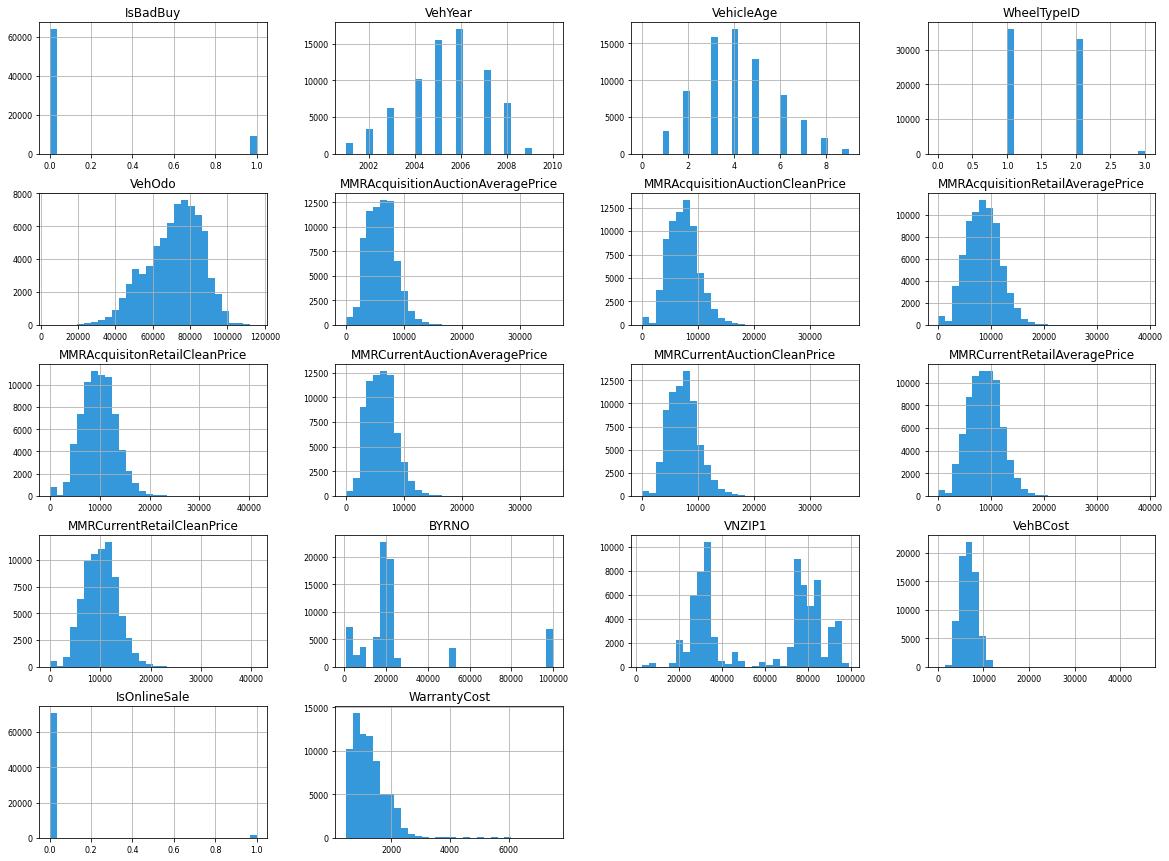

In [164]:
numerical_features = train_df.select_dtypes(include = ['float64', 'int64']).columns.drop('RefId')
train_df[numerical_features].hist(figsize=(20, 15), color = "#3498db", bins=30, xlabelsize=8, ylabelsize=8)

By the above graph we can observe that the data has variation in some columns and also vehical year ranges from 2001 to 2010.

[Text(0, 0.5, 'Number of Vehical'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Vehical Registration year')]

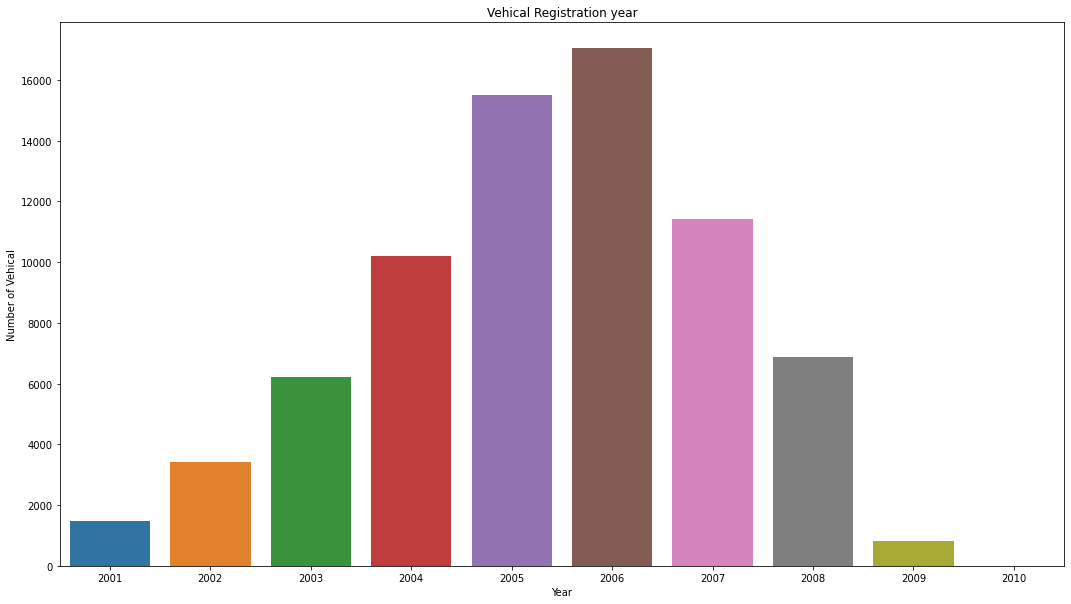

In [165]:
plt.figure(figsize=(18,10))
plt.title('Vehical Registration year')
gfg = sns.countplot(x=train_df.VehYear);
gfg.set(xlabel ="Year", ylabel = "Number of Vehical", title ='Vehical Registration year')

The vehical has registerd more in year 2006 and less in 2010

#### Year 

There are higher number of records for year 2006
 as expected than other year in the training data.

#### Model

[Text(0, 0.5, 'Number of Vehical'),
 Text(0.5, 0, 'Age'),
 Text(0.5, 1.0, 'Vehical age in year')]

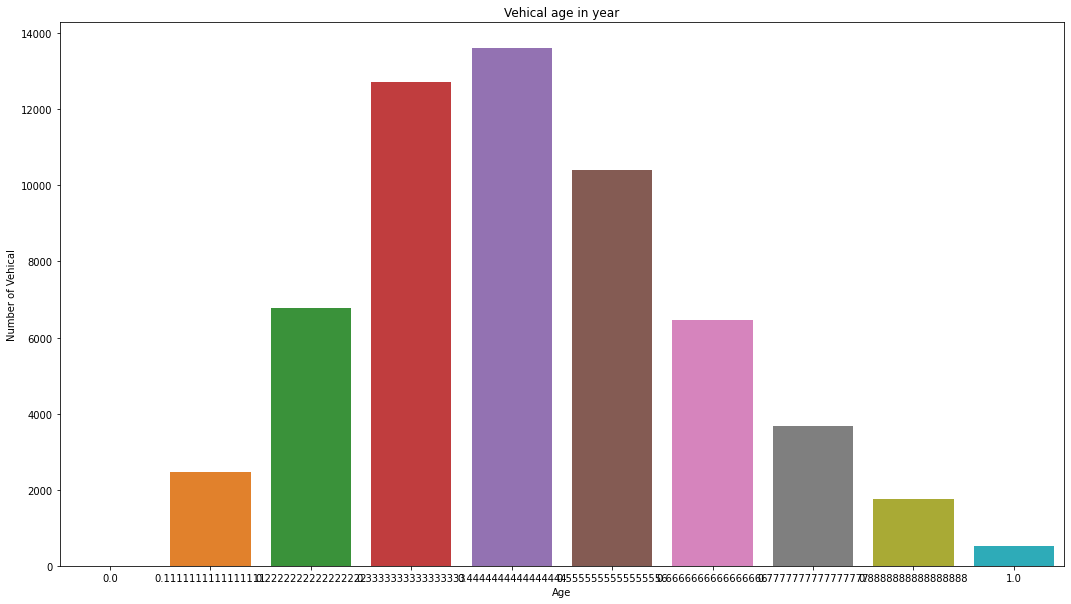

In [278]:
plt.figure(figsize=(18,10))
gfg = sns.countplot(x=train_df.VehicleAge);
gfg.set(xlabel ="Age", ylabel = "Number of Vehical", title ='Vehical age in year')


 All Vehicals is in between 1 to 9 year range.

#### WarrantyCost

[Text(0, 0.5, 'Number of Vehical'),
 Text(0.5, 0, 'WarrantyCost'),
 Text(0.5, 1.0, 'Vehical WarrantyCost ')]

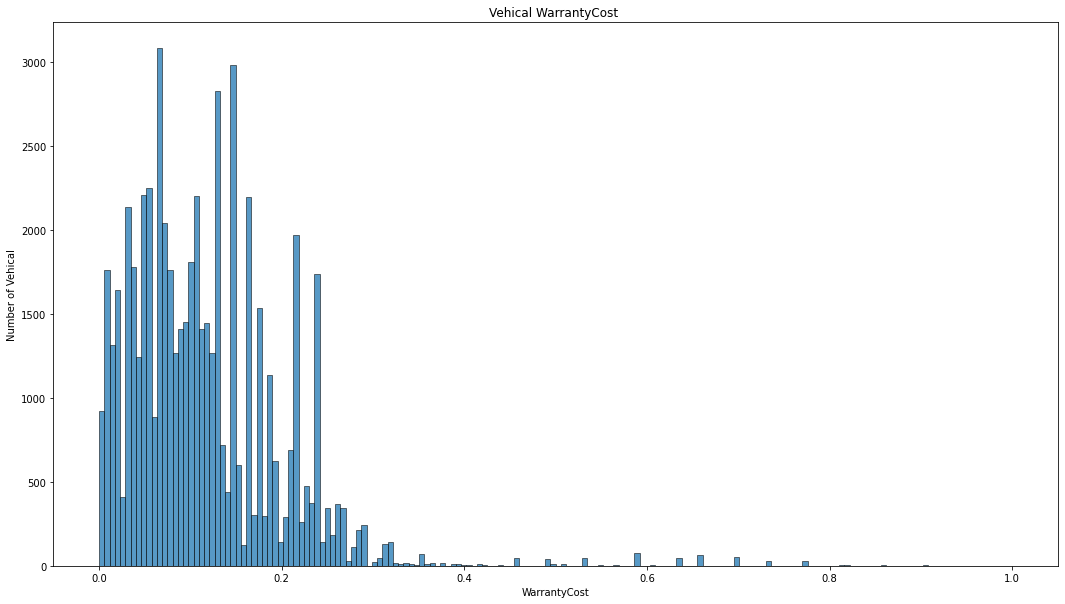

In [279]:
plt.figure(figsize=(18,10))
gfg = sns.histplot(x=train_df.WarrantyCost);
gfg.set(xlabel ="WarrantyCost", ylabel = "Number of Vehical", title ='Vehical WarrantyCost ')

There is cost between 1000 and 3000 of WarrantyCost in the training data.

`Insight`: There is no cost after 6500. 

#### WarrantyCost vs VehicleAge

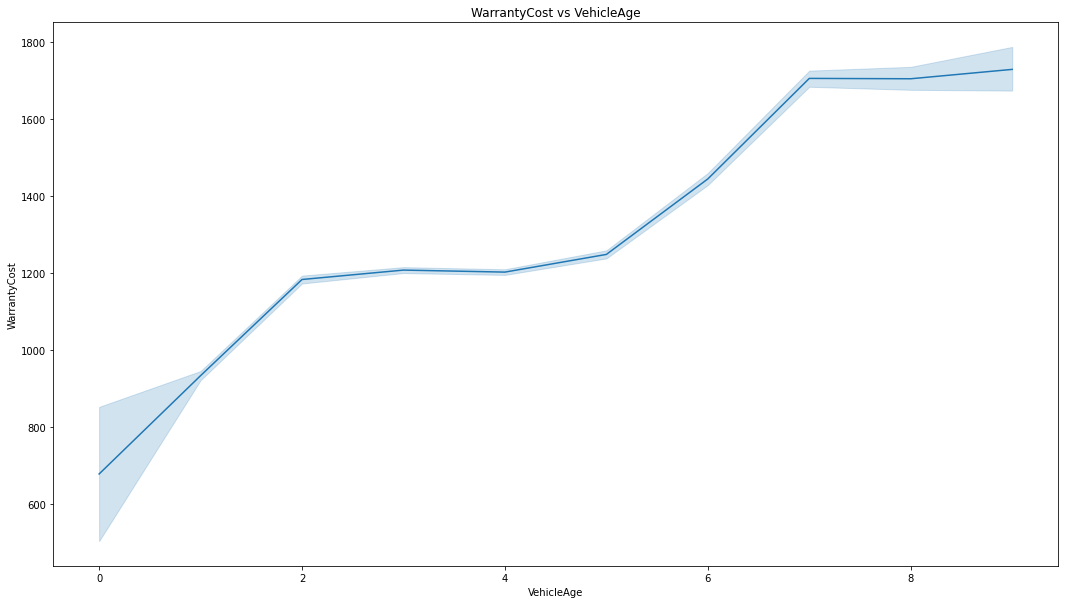

In [168]:
plt.figure(figsize=(18,10))
plt.title('WarrantyCost vs VehicleAge')
sns.lineplot(y=train_df.WarrantyCost,x=train_df.VehicleAge);

`Insight`: WarrantyCost will increase as Age increases.

#### MMRAcquisitionAuctionAveragePrice vs VehYear

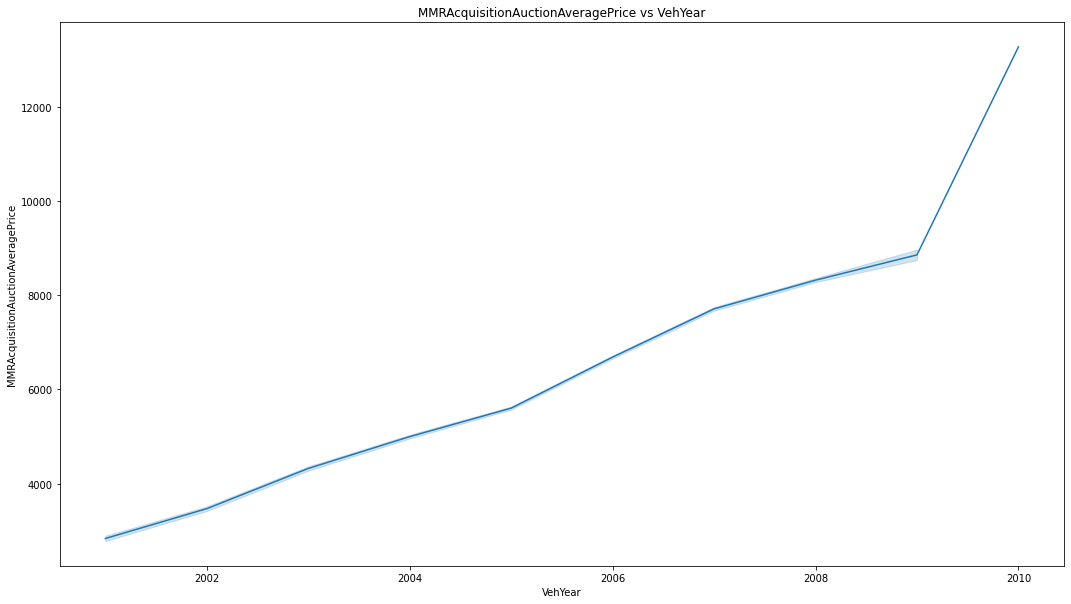

In [169]:
plt.figure(figsize=(18,10))
plt.title('MMRAcquisitionAuctionAveragePrice vs VehYear')
sns.lineplot(y=train_df.MMRAcquisitionAuctionAveragePrice,x=train_df.VehYear);

`Insight`: There is positive correlation between MMRAcquisitionAuctionAveragePrice vs VehYear.

### Ask & Answer Questions
1. Which year model has the highest Auction price sales? 


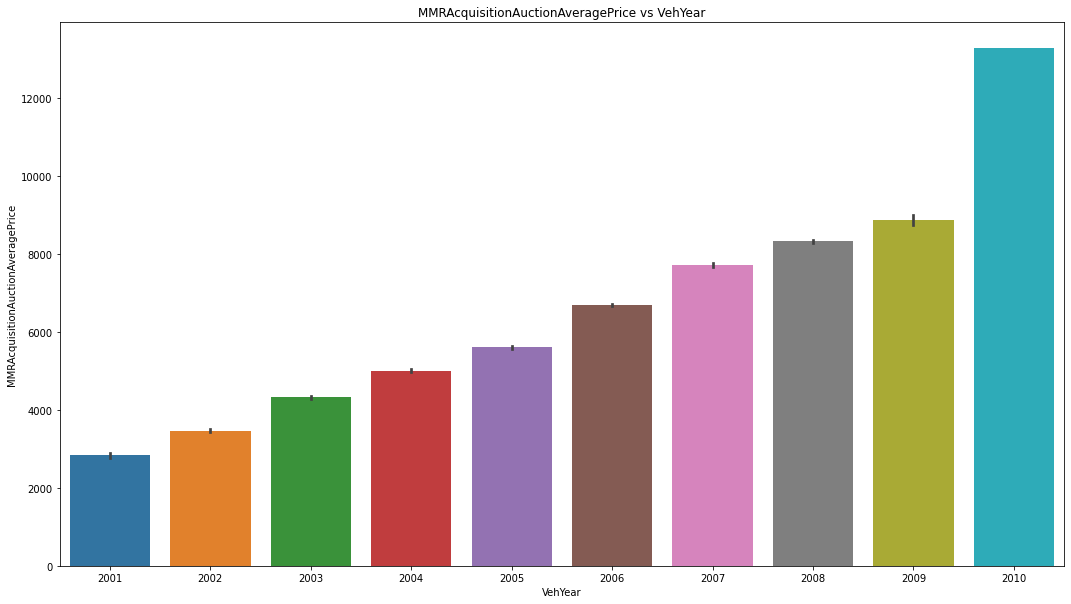

In [170]:
plt.figure(figsize=(18,10))
plt.title('MMRAcquisitionAuctionAveragePrice vs VehYear')
sns.barplot(y=train_df.MMRAcquisitionAuctionAveragePrice,x=train_df.VehYear);

vehical which is made on 2010 has highest price

#### 2. What is the trend of  MMRCurrentRetailCleanPrice and  MMRAcquisitionAuctionAveragePrice

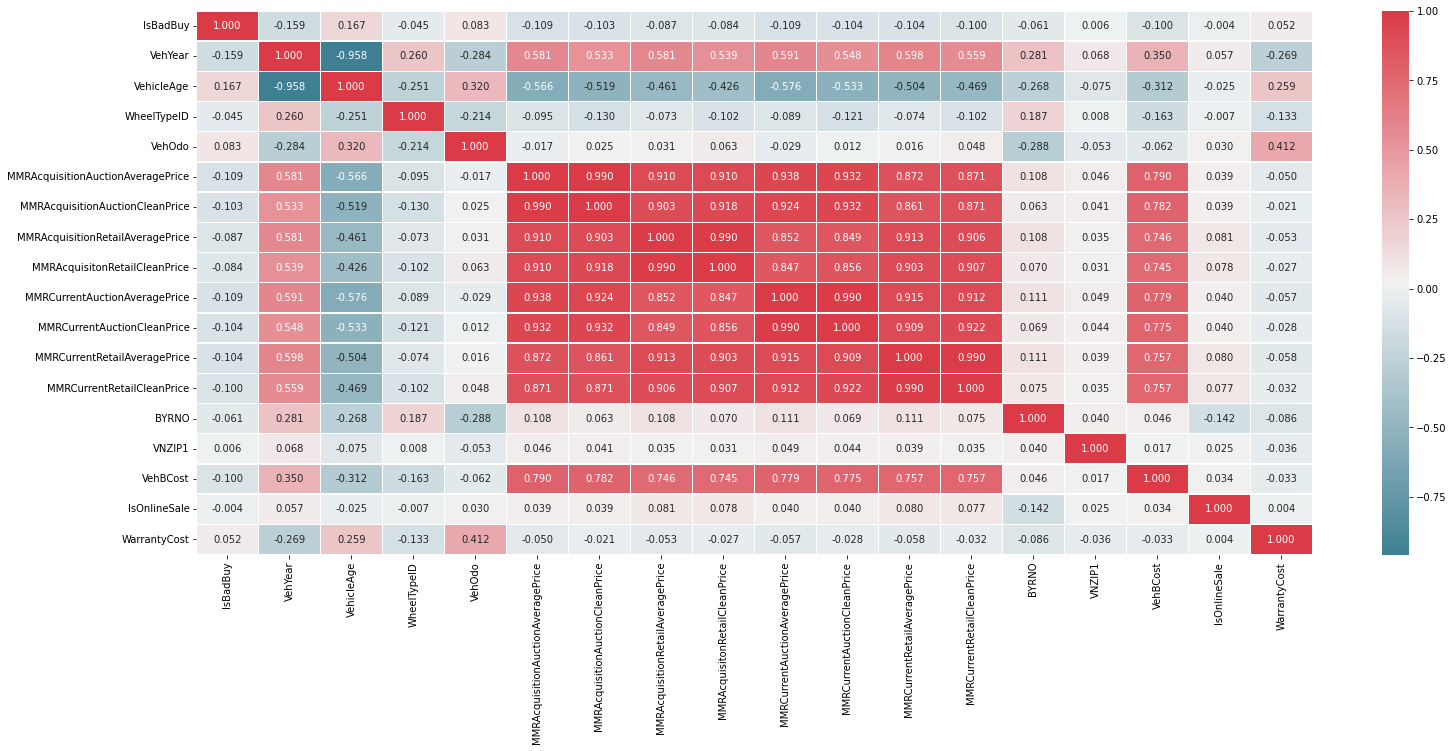

In [171]:
plt.figure(figsize=(25,10))
sns.heatmap(train_df[numerical_features].corr(),cmap = sns.diverging_palette(220, 10, as_cmap = True),annot=True, linewidths=.5, fmt= '.3f');
plt.show();

* 'MMRCurrentAuctionCleanPrice' has  99% corr with MMRCurrentAuctionAveragePrice.

* 'MMRCurrentRetailCleanPrice' has  99% corr with MMRCurrentRetailAveragePrice.

* 'MMRAcquisitionAuctionCleanPrice' has 99% corr with MMRAcquisitionAuctionAveragePrice.

* 'MMRAcquisitonRetailCleanPrice', has 99% corr with MMRQcquisitionRetailAverageprice.

* 'VehYear'  has 96% corr with 'VehicleAge'.


## 3. Prepare the Dataset for ML Training

I am going to follow these steps:
* Split Training & Validation Set
* Fill/Remove Missing Values
* Extract Inputs & Outputs
 * Training
 * Validation
 * Test
* Preprocessing the data

### Split Training & Validation Set

We will set aside the 20% of the dataset for  data for validation set.

In [172]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [173]:
train_df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
9093,9102,0,2/23/2009,MANHEIM,2007,2,FORD,FREESTYLE FWD V6 3.0,SEL,4D CUV 3.0L SEL,...,13220.0,15386.0,NaN,NaN,17675,27542,NC,8000.0,0,1506
13320,13330,0,2/3/2009,MANHEIM,2004,5,GMC,ENVOY 4WD 6C 4.2L I6,SLE,4D UTILITY 4.2L,...,9507.0,11429.0,NaN,NaN,20740,21075,MD,7195.0,0,2152
29596,29617,0,2/26/2010,OTHER,2008,2,DODGE,CALIBER,SE,4D WAGON,...,11284.0,11757.0,NaN,NaN,99761,74135,OK,7300.0,0,754
45118,45142,0,4/23/2009,OTHER,2004,5,CHEVROLET,IMPALA 3.4L V6 SFI,Bas,4D SEDAN,...,4434.0,5803.0,NaN,NaN,3453,80229,CO,5655.0,0,1974
2949,2952,0,6/2/2010,OTHER,2006,4,HYUNDAI,SONATA 4C,GLS,4D SEDAN GLS,...,9257.0,10548.0,NaN,NaN,8172,35004,AL,7900.0,0,728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,37217,1,6/8/2010,MANHEIM,2007,3,CHRYSLER,SEBRING V6,Bas,4D SEDAN,...,10763.0,11962.0,NaN,NaN,99750,46803,IN,8300.0,0,1118
6265,6272,0,4/29/2010,MANHEIM,2006,4,KIA,SPECTRA,EX,4D SEDAN,...,7125.0,8957.0,NaN,NaN,18881,30272,GA,7045.0,0,533
54886,54914,0,7/9/2010,OTHER,2006,4,CHEVROLET,MALIBU 4C,LT,4D SEDAN LT,...,10068.0,11984.0,NaN,NaN,99750,73108,OK,6700.0,0,1113
860,862,0,9/29/2009,ADESA,2006,3,PONTIAC,G6 V6 3.5L V6 SFI,Bas,4D SEDAN,...,10401.0,12057.0,NaN,NaN,99740,50111,IA,7295.0,0,1272


In [174]:
train_df.shape,val_df.shape

((58386, 34), (14597, 34))

### Drop Unwanted Columns

The dataset has many features, remove the features which are less likely to contribute

In [175]:


unique_id = ['RefId','BYRNO']
with_many_categories = ['VNZIP1','PurchDate', 'Make', 'Model', 'SubModel', 'Trim', 'VNST', 'Color'] 
redundant = ['WheelTypeID']
high_correlation = [ 'MMRCurrentAuctionCleanPrice',    # 99% corr with MMRCurrentAuctionAveragePrice
                    'MMRCurrentRetailCleanPrice',      # 99% corr with MMRCurrentRetailAveragePrice
                    'MMRAcquisitionAuctionCleanPrice', # 99% corr with MMRAcquisitionAuctionAveragePrice
                    'MMRAcquisitonRetailCleanPrice',    # 99% corr with MMRQcquisitionRetailAverageprice
                    'VehYear'                          # 96% corr with 'VehicleAge'
                   ]
columns_to_drop = unique_id + with_many_categories + redundant + high_correlation
train_df.drop(columns_to_drop,axis=1,inplace=True)
test_df.drop(columns_to_drop,axis=1,inplace=True)
val_df.drop(columns_to_drop,axis=1,inplace=True)

* Here These ['VNZIP1','PurchDate', 'Make', 'Model', 'SubModel', 'Trim', 'VNST', 'Color'] columns have many categories.

* Some of the columns have higly co-related

* we can ignore these columns for model training



In [176]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58386 entries, 9093 to 15795
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsBadBuy                           58386 non-null  int64  
 1   Auction                            58386 non-null  object 
 2   VehicleAge                         58386 non-null  int64  
 3   Transmission                       58379 non-null  object 
 4   WheelType                          55856 non-null  object 
 5   VehOdo                             58386 non-null  int64  
 6   Nationality                        58382 non-null  object 
 7   Size                               58382 non-null  object 
 8   TopThreeAmericanName               58382 non-null  object 
 9   MMRAcquisitionAuctionAveragePrice  58373 non-null  float64
 10  MMRAcquisitionRetailAveragePrice   58373 non-null  float64
 11  MMRCurrentAuctionAveragePrice      58129 non-null  

### Extract Inputs & Outputs

In [177]:
targets=train_df['IsBadBuy']
train_df.drop('IsBadBuy',axis=1,inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58386 entries, 9093 to 15795
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Auction                            58386 non-null  object 
 1   VehicleAge                         58386 non-null  int64  
 2   Transmission                       58379 non-null  object 
 3   WheelType                          55856 non-null  object 
 4   VehOdo                             58386 non-null  int64  
 5   Nationality                        58382 non-null  object 
 6   Size                               58382 non-null  object 
 7   TopThreeAmericanName               58382 non-null  object 
 8   MMRAcquisitionAuctionAveragePrice  58373 non-null  float64
 9   MMRAcquisitionRetailAveragePrice   58373 non-null  float64
 10  MMRCurrentAuctionAveragePrice      58129 non-null  float64
 11  MMRCurrentRetailAveragePrice       58129 non-null  

In [178]:
len(targets)

58386

In [179]:
targets_val=val_df['IsBadBuy']
val_df.drop('IsBadBuy',axis=1,inplace=True)

In [180]:
len(targets_val)

14597

In [181]:
val_df.info()
numerical_features_val = val_df.select_dtypes(include = ['float64', 'int64']).columns.tolist()
categorical_features_val = val_df.select_dtypes(include = 'object').columns.tolist()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14597 entries, 27851 to 38747
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Auction                            14597 non-null  object 
 1   VehicleAge                         14597 non-null  int64  
 2   Transmission                       14595 non-null  object 
 3   WheelType                          13953 non-null  object 
 4   VehOdo                             14597 non-null  int64  
 5   Nationality                        14596 non-null  object 
 6   Size                               14596 non-null  object 
 7   TopThreeAmericanName               14596 non-null  object 
 8   MMRAcquisitionAuctionAveragePrice  14592 non-null  float64
 9   MMRAcquisitionRetailAveragePrice   14592 non-null  float64
 10  MMRCurrentAuctionAveragePrice      14539 non-null  float64
 11  MMRCurrentRetailAveragePrice       14539 non-null 

In [182]:
# separate numerical and categorical features
train_df.info()
numerical_features = train_df.select_dtypes(include = ['float64', 'int64']).columns.tolist()
categorical_features = train_df.select_dtypes(include = 'object').columns.tolist()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58386 entries, 9093 to 15795
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Auction                            58386 non-null  object 
 1   VehicleAge                         58386 non-null  int64  
 2   Transmission                       58379 non-null  object 
 3   WheelType                          55856 non-null  object 
 4   VehOdo                             58386 non-null  int64  
 5   Nationality                        58382 non-null  object 
 6   Size                               58382 non-null  object 
 7   TopThreeAmericanName               58382 non-null  object 
 8   MMRAcquisitionAuctionAveragePrice  58373 non-null  float64
 9   MMRAcquisitionRetailAveragePrice   58373 non-null  float64
 10  MMRCurrentAuctionAveragePrice      58129 non-null  float64
 11  MMRCurrentRetailAveragePrice       58129 non-null  

### Fill Missing Values 



Let's check missing percentage of data.

In [183]:
train_df.isna().sum()*100/len(train_df)

Auction                               0.000000
VehicleAge                            0.000000
Transmission                          0.011989
WheelType                             4.333231
VehOdo                                0.000000
Nationality                           0.006851
Size                                  0.006851
TopThreeAmericanName                  0.006851
MMRAcquisitionAuctionAveragePrice     0.022266
MMRAcquisitionRetailAveragePrice      0.022266
MMRCurrentAuctionAveragePrice         0.440174
MMRCurrentRetailAveragePrice          0.440174
PRIMEUNIT                            95.284829
AUCGUART                             95.284829
VehBCost                              0.000000
IsOnlineSale                          0.000000
WarrantyCost                          0.000000
dtype: float64

In [184]:
val_df.isna().sum()*100/len(val_df)

Auction                               0.000000
VehicleAge                            0.000000
Transmission                          0.013701
WheelType                             4.411865
VehOdo                                0.000000
Nationality                           0.006851
Size                                  0.006851
TopThreeAmericanName                  0.006851
MMRAcquisitionAuctionAveragePrice     0.034254
MMRAcquisitionRetailAveragePrice      0.034254
MMRCurrentAuctionAveragePrice         0.397342
MMRCurrentRetailAveragePrice          0.397342
PRIMEUNIT                            95.437419
AUCGUART                             95.437419
VehBCost                              0.000000
IsOnlineSale                          0.000000
WarrantyCost                          0.000000
dtype: float64

I will use mean of numeric to impute the missing values.
Distribution of most of the column is right skewed, here other options are not a good measure of central tendency, hence I am using mean.

In [185]:
from sklearn.impute import SimpleImputer

In [186]:
imputer=SimpleImputer(strategy='mean');

In [187]:
imputer.fit(train_df[numerical_features]);

In [188]:
imputer.fit(val_df[numerical_features_val]);

In [189]:
train_df[numerical_features]=imputer.transform(train_df[numerical_features]);

In [190]:
val_df[numerical_features_val]=imputer.transform(val_df[numerical_features_val]);

In [191]:
test_df[numerical_features]=imputer.transform(test_df[numerical_features]);

In [192]:
# Add Unknown type for missing category values
for c in categorical_features:
    train_df[c].fillna('Unknown',inplace=True)
    test_df[c].fillna('Unknown',inplace=True)

In [193]:
# Add Unknown type for missing category values
for c in categorical_features_val:
    val_df[c].fillna('Unknown',inplace=True)
    

In [194]:
train_df.isna().sum()*100/len(train_df)

Auction                              0.0
VehicleAge                           0.0
Transmission                         0.0
WheelType                            0.0
VehOdo                               0.0
Nationality                          0.0
Size                                 0.0
TopThreeAmericanName                 0.0
MMRAcquisitionAuctionAveragePrice    0.0
MMRAcquisitionRetailAveragePrice     0.0
MMRCurrentAuctionAveragePrice        0.0
MMRCurrentRetailAveragePrice         0.0
PRIMEUNIT                            0.0
AUCGUART                             0.0
VehBCost                             0.0
IsOnlineSale                         0.0
WarrantyCost                         0.0
dtype: float64

In [195]:
test_df.isna().sum()

Auction                              0
VehicleAge                           0
Transmission                         0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionRetailAveragePrice     0
MMRCurrentAuctionAveragePrice        0
MMRCurrentRetailAveragePrice         0
PRIMEUNIT                            0
AUCGUART                             0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
dtype: int64

In [196]:
val_df.isna().sum()*100/len(val_df)

Auction                              0.0
VehicleAge                           0.0
Transmission                         0.0
WheelType                            0.0
VehOdo                               0.0
Nationality                          0.0
Size                                 0.0
TopThreeAmericanName                 0.0
MMRAcquisitionAuctionAveragePrice    0.0
MMRAcquisitionRetailAveragePrice     0.0
MMRCurrentAuctionAveragePrice        0.0
MMRCurrentRetailAveragePrice         0.0
PRIMEUNIT                            0.0
AUCGUART                             0.0
VehBCost                             0.0
IsOnlineSale                         0.0
WarrantyCost                         0.0
dtype: float64

In [197]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58386 entries, 9093 to 15795
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Auction                            58386 non-null  object 
 1   VehicleAge                         58386 non-null  float64
 2   Transmission                       58386 non-null  object 
 3   WheelType                          58386 non-null  object 
 4   VehOdo                             58386 non-null  float64
 5   Nationality                        58386 non-null  object 
 6   Size                               58386 non-null  object 
 7   TopThreeAmericanName               58386 non-null  object 
 8   MMRAcquisitionAuctionAveragePrice  58386 non-null  float64
 9   MMRAcquisitionRetailAveragePrice   58386 non-null  float64
 10  MMRCurrentAuctionAveragePrice      58386 non-null  float64
 11  MMRCurrentRetailAveragePrice       58386 non-null  

In [198]:
val_df.columns

Index(['Auction', 'VehicleAge', 'Transmission', 'WheelType', 'VehOdo',
       'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentRetailAveragePrice',
       'PRIMEUNIT', 'AUCGUART', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [199]:
train_df.columns

Index(['Auction', 'VehicleAge', 'Transmission', 'WheelType', 'VehOdo',
       'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentRetailAveragePrice',
       'PRIMEUNIT', 'AUCGUART', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [200]:
train_df.columns


Index(['Auction', 'VehicleAge', 'Transmission', 'WheelType', 'VehOdo',
       'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentRetailAveragePrice',
       'PRIMEUNIT', 'AUCGUART', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

#### Training 

In [201]:
input_cols=['Auction', 'VehicleAge', 'Transmission', 'WheelType', 'VehOdo',
       'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentRetailAveragePrice',
       'PRIMEUNIT', 'AUCGUART', 'VehBCost', 'IsOnlineSale', 'WarrantyCost']                       
                        

In [202]:
target_col=['IsBadBuy']

In [203]:
train_inputs=train_df[input_cols]

In [204]:
train_targets=targets

In [205]:
train_inputs

,Auction,VehicleAge,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,PRIMEUNIT,AUCGUART,VehBCost,IsOnlineSale,WarrantyCost
9093,MANHEIM,2.0,AUTO,Alloy,72485.0,AMERICAN,CROSSOVER,FORD,11450.0,12866.0,11778.0,13220.0,Unknown,Unknown,8000.0,0.0,1506.0
13320,MANHEIM,5.0,AUTO,Alloy,80338.0,AMERICAN,MEDIUM SUV,GM,6590.0,7617.0,8340.0,9507.0,Unknown,Unknown,7195.0,0.0,2152.0
29596,OTHER,2.0,AUTO,Alloy,51904.0,AMERICAN,MEDIUM,CHRYSLER,7774.0,10852.0,7901.0,11284.0,Unknown,Unknown,7300.0,0.0,754.0
45118,OTHER,5.0,AUTO,Covers,77375.0,AMERICAN,LARGE,GM,3643.0,4434.0,3643.0,4434.0,Unknown,Unknown,5655.0,0.0,1974.0
2949,OTHER,4.0,AUTO,Alloy,62031.0,OTHER ASIAN,MEDIUM,OTHER,6584.0,10231.0,5989.0,9257.0,Unknown,Unknown,7900.0,0.0,728.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,MANHEIM,3.0,AUTO,Covers,67452.0,AMERICAN,MEDIUM,CHRYSLER,7471.0,10916.0,7612.0,10763.0,Unknown,Unknown,8300.0,0.0,1118.0
6265,MANHEIM,4.0,AUTO,Alloy,67182.0,OTHER ASIAN,MEDIUM,OTHER,5768.0,9019.0,4194.0,7125.0,Unknown,Unknown,7045.0,0.0,533.0
54886,OTHER,4.0,AUTO,Alloy,89342.0,AMERICAN,MEDIUM,GM,7162.0,10348.0,6736.0,10068.0,Unknown,Unknown,6700.0,0.0,1113.0
860,ADESA,3.0,AUTO,Alloy,78991.0,AMERICAN,MEDIUM,GM,7091.0,8158.0,7148.0,10401.0,Unknown,Unknown,7295.0,0.0,1272.0


In [206]:
len(train_targets)

58386

In [207]:
train_df.head()

,Auction,VehicleAge,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,PRIMEUNIT,AUCGUART,VehBCost,IsOnlineSale,WarrantyCost
9093,MANHEIM,2.0,AUTO,Alloy,72485.0,AMERICAN,CROSSOVER,FORD,11450.0,12866.0,11778.0,13220.0,Unknown,Unknown,8000.0,0.0,1506.0
13320,MANHEIM,5.0,AUTO,Alloy,80338.0,AMERICAN,MEDIUM SUV,GM,6590.0,7617.0,8340.0,9507.0,Unknown,Unknown,7195.0,0.0,2152.0
29596,OTHER,2.0,AUTO,Alloy,51904.0,AMERICAN,MEDIUM,CHRYSLER,7774.0,10852.0,7901.0,11284.0,Unknown,Unknown,7300.0,0.0,754.0
45118,OTHER,5.0,AUTO,Covers,77375.0,AMERICAN,LARGE,GM,3643.0,4434.0,3643.0,4434.0,Unknown,Unknown,5655.0,0.0,1974.0
2949,OTHER,4.0,AUTO,Alloy,62031.0,OTHER ASIAN,MEDIUM,OTHER,6584.0,10231.0,5989.0,9257.0,Unknown,Unknown,7900.0,0.0,728.0


#### Validation

In [208]:
val_inputs=val_df[input_cols]


In [209]:
val_targets=targets_val

In [210]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14597 entries, 27851 to 38747
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Auction                            14597 non-null  object 
 1   VehicleAge                         14597 non-null  float64
 2   Transmission                       14597 non-null  object 
 3   WheelType                          14597 non-null  object 
 4   VehOdo                             14597 non-null  float64
 5   Nationality                        14597 non-null  object 
 6   Size                               14597 non-null  object 
 7   TopThreeAmericanName               14597 non-null  object 
 8   MMRAcquisitionAuctionAveragePrice  14597 non-null  float64
 9   MMRAcquisitionRetailAveragePrice   14597 non-null  float64
 10  MMRCurrentAuctionAveragePrice      14597 non-null  float64
 11  MMRCurrentRetailAveragePrice       14597 non-null 

In [211]:
val_inputs=val_df[input_cols]

In [212]:
val_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14597 entries, 27851 to 38747
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Auction                            14597 non-null  object 
 1   VehicleAge                         14597 non-null  float64
 2   Transmission                       14597 non-null  object 
 3   WheelType                          14597 non-null  object 
 4   VehOdo                             14597 non-null  float64
 5   Nationality                        14597 non-null  object 
 6   Size                               14597 non-null  object 
 7   TopThreeAmericanName               14597 non-null  object 
 8   MMRAcquisitionAuctionAveragePrice  14597 non-null  float64
 9   MMRAcquisitionRetailAveragePrice   14597 non-null  float64
 10  MMRCurrentAuctionAveragePrice      14597 non-null  float64
 11  MMRCurrentRetailAveragePrice       14597 non-null 

In [213]:
val_targets=targets_val

In [214]:
val_inputs

,Auction,VehicleAge,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,PRIMEUNIT,AUCGUART,VehBCost,IsOnlineSale,WarrantyCost
27851,MANHEIM,6.0,AUTO,Covers,70008.0,AMERICAN,VAN,FORD,2677.0,3391.0,2554.0,3258.0,Unknown,Unknown,4200.0,0.0,2157.0
51596,MANHEIM,5.0,AUTO,Special,84628.0,AMERICAN,MEDIUM SUV,FORD,5602.0,6550.0,6473.0,10117.0,Unknown,Unknown,6800.0,0.0,1893.0
31933,OTHER,4.0,AUTO,Alloy,59369.0,AMERICAN,CROSSOVER,CHRYSLER,6902.0,7954.0,6600.0,7628.0,Unknown,Unknown,8800.0,0.0,1086.0
12335,OTHER,3.0,AUTO,Alloy,74180.0,AMERICAN,MEDIUM,GM,7371.0,8461.0,6528.0,7550.0,Unknown,Unknown,7305.0,0.0,1272.0
68933,ADESA,3.0,AUTO,Alloy,74783.0,OTHER ASIAN,MEDIUM SUV,OTHER,8916.0,10129.0,8236.0,11631.0,Unknown,Unknown,8300.0,0.0,569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52554,MANHEIM,6.0,AUTO,Alloy,54556.0,OTHER ASIAN,MEDIUM,OTHER,4949.0,8369.0,5396.0,8699.0,Unknown,Unknown,8405.0,1.0,1003.0
50223,MANHEIM,5.0,AUTO,Covers,82670.0,AMERICAN,VAN,CHRYSLER,2834.0,3561.0,5211.0,6128.0,Unknown,Unknown,4335.0,0.0,1763.0
15260,MANHEIM,5.0,AUTO,Covers,73718.0,AMERICAN,LARGE,GM,4384.0,7804.0,4352.0,7033.0,Unknown,Unknown,6035.0,0.0,1974.0
26629,MANHEIM,2.0,AUTO,Covers,61636.0,AMERICAN,MEDIUM,CHRYSLER,7606.0,8714.0,7639.0,11066.0,Unknown,Unknown,7540.0,0.0,825.0


In [215]:
val_targets

27851    0
51596    0
31933    0
12335    0
68933    0
        ..
52554    0
50223    0
15260    1
26629    0
38747    0
Name: IsBadBuy, Length: 14597, dtype: int64

#### Test

In [216]:
test_inputs=test_df[input_cols]

In [217]:
test_inputs

,Auction,VehicleAge,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,PRIMEUNIT,AUCGUART,VehBCost,IsOnlineSale,WarrantyCost
0,ADESA,4.0,AUTO,Alloy,85377.0,AMERICAN,LARGE,GM,5032.0,5935.0,4905.0,8557.0,Unknown,Unknown,6500.0,0.0,2152.0
1,ADESA,4.0,AUTO,Alloy,61873.0,AMERICAN,MEDIUM,GM,4502.0,5362.0,4645.0,7562.0,Unknown,Unknown,6300.0,0.0,1118.0
2,ADESA,3.0,AUTO,Alloy,69283.0,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,11564.0,10883.0,15340.0,Unknown,Unknown,9700.0,0.0,1215.0
3,ADESA,7.0,AUTO,Alloy,87889.0,AMERICAN,MEDIUM,GM,2558.0,3263.0,2928.0,5725.0,Unknown,Unknown,4150.0,0.0,1933.0
4,ADESA,2.0,AUTO,Unknown,73432.0,OTHER ASIAN,COMPACT,OTHER,5013.0,5914.0,5013.0,5914.0,Unknown,Unknown,4100.0,0.0,920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,MANHEIM,5.0,AUTO,Alloy,88645.0,AMERICAN,LARGE,FORD,5358.0,8987.0,5761.0,9764.0,Unknown,Unknown,7955.0,0.0,1633.0
48703,MANHEIM,3.0,AUTO,Covers,81862.0,TOP LINE ASIAN,COMPACT,OTHER,6849.0,10999.0,6856.0,10283.0,Unknown,Unknown,7035.0,0.0,594.0
48704,MANHEIM,4.0,AUTO,Covers,82451.0,OTHER ASIAN,MEDIUM,OTHER,4662.0,7972.0,4833.0,7871.0,NO,GREEN,6335.0,0.0,594.0
48705,MANHEIM,5.0,AUTO,Alloy,75760.0,OTHER ASIAN,MEDIUM,OTHER,5953.0,9137.0,5092.0,8576.0,NO,GREEN,8055.0,0.0,1038.0


### Preprocessing

Let's convert categorical data (object) to one hot encoding as machine learning model can handle only numbers.

In [218]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
encoder.fit(train_df[categorical_features])
encoded_cols=list(encoder.get_feature_names(categorical_features))
train_df[encoded_cols]=encoder.transform(train_df[categorical_features]);
test_df[encoded_cols]=encoder.transform(test_df[categorical_features]);
val_df[encoded_cols]=encoder.transform(val_df[categorical_features_val]);

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005]. 

In [219]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_df[numerical_features]);
train_df[numerical_features]=scaler.transform(train_df[numerical_features])
test_df[numerical_features]=scaler.transform(test_df[numerical_features])
val_df[numerical_features]=scaler.transform(val_df[numerical_features_val])

In [220]:
train_df=train_df[numerical_features+encoded_cols]
test_df=test_df[numerical_features+encoded_cols]
val_df=val_df[numerical_features_val+encoded_cols]

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, targets, test_size=0.15, random_state=0)

In [222]:
X_val, X_test, y_val, y_test = train_test_split(val_df, targets_val, test_size=0.15, random_state=0)

## 4. Train Hardcoded & Baseline Models

* Hardcoded model: Always predict ISBADBUY option
* Baseline model: Decision Tree Classification

For evaluation the dataset F1 Score: [check](https://scikit-learn.org/0.15/modules/generated/sklearn.metrics.f1_score.html)

### Hardcoded Model

Let's create a simple model that always predict the Good or bad buy.

In [223]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [224]:
logreg = LogisticRegression()

In [225]:
clf = logreg.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [226]:
clf = logreg.fit(X_val,y_val)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [227]:
acc_train_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_test_log = round(logreg.score(X_test, y_test) * 100, 2)

print('logistic regression train accurary: ',acc_train_log)
print('logistic regression test accurary: ',acc_test_log)


logistic regression train accurary:  89.37
logistic regression test accurary:  89.95


This Model gave accuracy of 90.05 percentage of test data

Test Model for Validation set

In [229]:
acc_val_log = round(logreg.score(X_val, y_val) * 100, 2)
acc_test_log = round(logreg.score(X_test, y_test) * 100, 2)

print('logistic regression val accurary: ',acc_val_log)
print('logistic regression test accurary: ',acc_test_log)


logistic regression val accurary:  89.61
logistic regression test accurary:  89.95


logistic regression validation  accurary is  89.61

In [230]:
train_preds=logreg.predict(X_train)

In [232]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

### Baseline Model

Lets try to train RandomForestClassifier as the next Model on our dataset 

I will train RandomForestClassifier model as our baseline model.  However, now we have a baseline model that our other models should ideally beat.

In [233]:
from sklearn.ensemble import RandomForestClassifier

In [234]:
random_forest = RandomForestClassifier(n_estimators=100)

In [235]:
clf = random_forest.fit(X_train, y_train)

In [236]:
acc_train_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_test_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)

print('Random Forest train accurary: ',acc_train_random_forest)
print('Random Forest test accurary: ',acc_test_random_forest)



Random Forest train accurary:  100.0
Random Forest test accurary:  89.86


In [237]:
acc_val_random_forest = round(random_forest.score(X_val, y_val) * 100, 2)
acc_test_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)

print('Random Forest val accurary: ',acc_val_random_forest)
print('Random Forest test accurary: ',acc_test_random_forest)


Random Forest val accurary:  89.95
Random Forest test accurary:  89.86
Random Fores test ROC:  0.735


Training Accuarcy is 89.86 and Validation accuracy is 89.95 which is better than previous model.



Finding the best featureusing by plotting graph





In [238]:
importance_df=pd.DataFrame({
    'feature':X_train.columns,
    'importance':clf.feature_importances_
}).sort_values('importance',ascending=False)

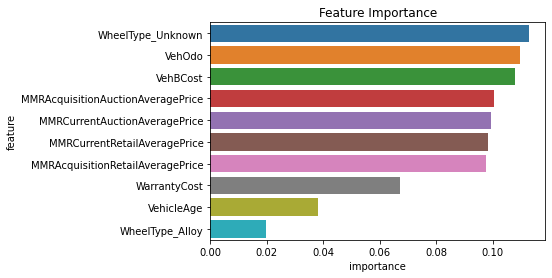

In [239]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),x='importance',y='feature')

By the above graph we can observe that VehOdo , VehBCost ,MMRAcquisitionAuctionAveragePrice,MMRAcquisitonRetailCleanPrice  are the important features of the Model

## 5. Train & Evaluate Different Model

 ### XGBClassifier

In [240]:
from xgboost import XGBClassifier

In [241]:
# Create the model
xgb = XGBClassifier()


In [242]:
clr = xgb.fit(X_train, y_train)

In [280]:
acc_train_xgb = round(clr.score(X_train, y_train) * 100, 2)
acc_test_xgb = round(clr.score(X_test, y_test) * 100, 2)

print('xgb train accurary: ',acc_train_xgb)
print('xgb test accurary: ',acc_test_xgb)


xgb train accurary:  90.17
xgb test accurary:  90.27


In [281]:
acc_val_xgb = round(clr.score(X_val, y_val) * 100, 2)
acc_test_xgb = round(clr.score(X_test, y_test) * 100, 2)

print('xgb val accurary: ',acc_val_xgb)
print('xgb test accurary: ',acc_test_xgb)


xgb val accurary:  90.15
xgb test accurary:  90.27


Training Accuarcy is 90.5 and Validation accuracy is 90.1 which is better than all previous models.




## 6. Hyperparameter Tuning

In [245]:
param_test2 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
 'subsample': [0.8],
 'colsample_bytree': [0.7]
}
             

In [246]:
from sklearn.model_selection import train_test_split , GridSearchCV
gsearch2 = GridSearchCV(estimator=clr,param_grid=param_test2 , cv = 10 , n_jobs=-1)
gsearch2.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2),
                         'subsample': [0.8]})

Finding best parameters of XGBOOST

In [247]:
gsearch2.best_params_

{'colsample_bytree': 0.7,
 'max_depth': 9,
 'min_child_weight': 1,
 'subsample': 0.8}

In [248]:
xgb1 = XGBClassifier(colsample_bytree = 0.7,
 max_depth= 9,
 min_child_weight= 1,
subsample= 0.8)

In [249]:
clr1 = xgb1.fit(X_train, y_train)

In [256]:
acc_val_xgb = round(clr1.score(X_val, y_val) * 100, 2)
acc_test_xgb = round(clr1.score(X_test, y_test) * 100, 2)

print('xgb val accurary: ',acc_val_xgb)
print('xgb test accurary: ',acc_test_xgb)


xgb val accurary:  90.1
xgb test accurary:  90.5


In [251]:
gsearch2.score(X_test,y_test)

0.9050228310502283

In [254]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        acc_train_xgb , acc_val_xgb = test_params(**params)
        train_errors.append(acc_train_xgb)
        val_errors.append(acc_val_xgb)
      
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSLE')
    plt.legend(['Training', 'Validation'])

### max_depth

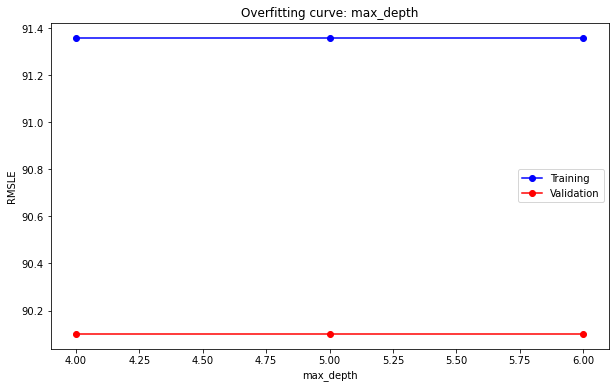

In [259]:
test_param_and_plot('max_depth', [4,5,6])

For the hyperparameter max_depth, 9 is the giving the optimal solution.

### min_child_weight

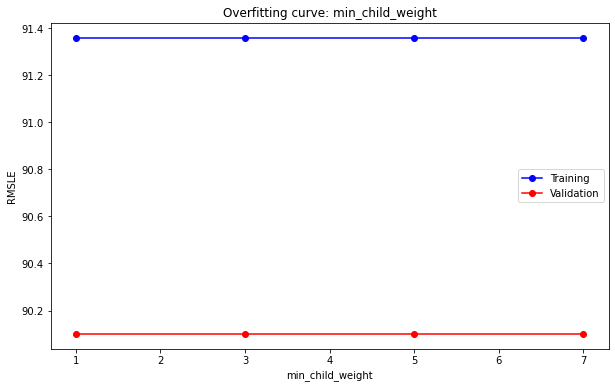

In [260]:
test_param_and_plot('min_child_weight', [1,3,5,7])

From the above graph, 90% of the features i.e 0.9 as the value of min_child_weigh is the giving the optimal solution.

## 7. Final Model

In [261]:
xgb_final =  XGBClassifier(colsample_bytree = 0.7,max_depth= 9,min_child_weight= 1,subsample= 0.8)
 

In [262]:
xgb_final.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.7, max_depth=9, subsample=0.8)

In [277]:
acc_val_xgb = round(xgb_final.score(X_val, y_val) * 100, 2)
acc_test_xgb = round(xgb_final.score(X_test, y_test) * 100, 2)

print('xgb val accurary: ',acc_val_xgb)
print('xgb test accurary: ',acc_test_xgb)

xgb val accurary:  90.1
xgb test accurary:  90.5


In [270]:
predictions = xgb_final.predict_proba(test_df)[:, 1]
submissions_df['IsBadBuy'] = predictions
submissions_df.to_csv('Xgboost.csv',index=False)

Training accuracy is 90.5 and validation is 90.1 for final model




## 8. Make Predictions and Submit to Kaggle

I will follows these steps:
* Make predictions for test set
* Generate submission csv
* Submit to Kaggle

In [274]:
test_inputs

,Auction,VehicleAge,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,PRIMEUNIT,AUCGUART,VehBCost,IsOnlineSale,WarrantyCost
0,ADESA,4.0,AUTO,Alloy,85377.0,AMERICAN,LARGE,GM,5032.0,5935.0,4905.0,8557.0,Unknown,Unknown,6500.0,0.0,2152.0
1,ADESA,4.0,AUTO,Alloy,61873.0,AMERICAN,MEDIUM,GM,4502.0,5362.0,4645.0,7562.0,Unknown,Unknown,6300.0,0.0,1118.0
2,ADESA,3.0,AUTO,Alloy,69283.0,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,11564.0,10883.0,15340.0,Unknown,Unknown,9700.0,0.0,1215.0
3,ADESA,7.0,AUTO,Alloy,87889.0,AMERICAN,MEDIUM,GM,2558.0,3263.0,2928.0,5725.0,Unknown,Unknown,4150.0,0.0,1933.0
4,ADESA,2.0,AUTO,Unknown,73432.0,OTHER ASIAN,COMPACT,OTHER,5013.0,5914.0,5013.0,5914.0,Unknown,Unknown,4100.0,0.0,920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,MANHEIM,5.0,AUTO,Alloy,88645.0,AMERICAN,LARGE,FORD,5358.0,8987.0,5761.0,9764.0,Unknown,Unknown,7955.0,0.0,1633.0
48703,MANHEIM,3.0,AUTO,Covers,81862.0,TOP LINE ASIAN,COMPACT,OTHER,6849.0,10999.0,6856.0,10283.0,Unknown,Unknown,7035.0,0.0,594.0
48704,MANHEIM,4.0,AUTO,Covers,82451.0,OTHER ASIAN,MEDIUM,OTHER,4662.0,7972.0,4833.0,7871.0,NO,GREEN,6335.0,0.0,594.0
48705,MANHEIM,5.0,AUTO,Alloy,75760.0,OTHER ASIAN,MEDIUM,OTHER,5953.0,9137.0,5092.0,8576.0,NO,GREEN,8055.0,0.0,1038.0


In [275]:
def predict_and_submit(model,test_inputs,fname):
  predictions = clr.predict_proba(test_df)[:, 1]
  sub_df=pd.read_csv(data_dir+'/example_entry.csv')
  submissions_df['IsBadBuy'] = predictions
  sub_df.to_csv(fname,index=None)
  return sub_df

In [276]:
predict_and_submit(xgb_final,X_test,'XGboost.csv')

,RefId,IsBadBuy
0,73015,0
1,73016,0
2,73017,0
3,73018,0
4,73019,0
...,...,...
48702,121742,0
48703,121743,0
48704,121744,0
48705,121745,0


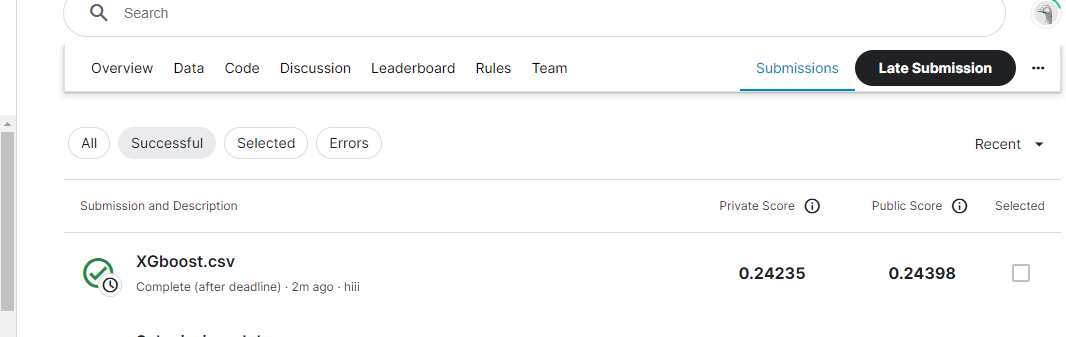

Hence, the final model is giving us \$0.2442 away from the original car dataset for the test set.

## 9. Summary & Conclusion:
- Problem Statement: One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of that the vehicle might have serious issues that prevent it from being sold to customers. The auto community calls these unfortunate purchases "kicks".




- The challenge of this competition is to predict if the car purchased at the Auction is a Kick (bad buy)..

- Evaluation: The evaluation metric for this project is F1 Score which is calculated as:
  $[{2* \frac{Precision*Recall}{Precision + Recall}}]$


- Our dump hard-coded model is This Model gave accuracy of 90.05 percentage of test data.

- For Random Forest Classifier,Training Accuarcy is 90.05 and Validation accuracy is 89.97 which is better than previous model..

- For XGBOOST classifier, Training Accuarcy is 90.5 and Validation accuracy is 90.1 which is better than Random Forest Classifier and all previous models.

- After hyperparameter tuning,Training Accuarcy is 90.5 and Validation accuracy is 90.1 with the following parameters 'colsample_bytree': 0.7,
 'max_depth': 9,
 'min_child_weight': 1,
 'subsample': 0.8.

- Important features for predicting the Buy is VehOdo , VehBCost ,MMRAcquisitionAuctionAveragePrice,MMRAcquisitonRetailCleanPrice .

- Kaggle score is 0.24. 

## 10. Future Work Ideas

- Perform feature engineering like seasonality feature to get better results.
- Can do more hyperparameter tuning and regularization to decrease the error.

## 11. References

- How to approch machine learning problem: https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/how-to-approach-machine-learning-problems
- Decision Trees & Random Forest: https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/decision-trees-and-random-forests
- Exploratory Data Analysis Case Study: https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/exploratory-data-analysis-case-study
- Visualization with Matplotlib & Seaborn: https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/visualization-with-matplotlib-and-seaborn
- Datetime in Pandas: https://psgpyc.medium.com/datetime-in-pandas-read-csv-everything-you-have-to-know-8245bd048fa
- Different ways to convert datatypes: https://sparkbyexamples.com/pandas/pandas-change-column-data-type-dttype/
- Sklearn Library: https://scikit-learn.org/stable/